In [1]:
!kaggle datasets download -d dgomonov/new-york-city-airbnb-open-data

 82%|███████████████████████████████       | 2.00M/2.44M [00:01<00:00, 1.85MB/s]
100%|██████████████████████████████████████| 2.44M/2.44M [00:01<00:00, 2.42MB/s]


In [2]:
!unzip new-york-city-airbnb-open-data.zip

Archive:  new-york-city-airbnb-open-data.zip
  inflating: AB_NYC_2019.csv         
  inflating: New_York_City_.png      


In [3]:
!rm New_York_City_.png 

In [4]:
!rm new-york-city-airbnb-open-data.zip

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('AB_NYC_2019.csv')

In [8]:
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [10]:
target = df.price.values

<AxesSubplot:ylabel='Count'>

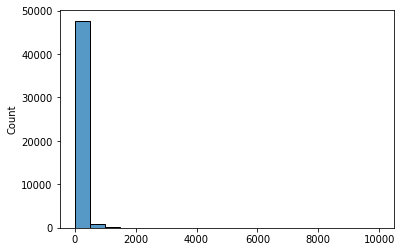

In [18]:
sns.histplot(target, bins=20)

#### data has a long right tale

In [19]:
cols = ['latitude',
'longitude',
'price',
'minimum_nights',
'number_of_reviews',
'reviews_per_month',
'calculated_host_listings_count',
'availability_365'
       ]

In [20]:
df = df[cols]

## Question 1

In [22]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## Question 2

In [23]:
df.minimum_nights.median()

3.0

## Question 3

In [41]:
np.random.seed(42)
n = len(df)
idx = np.arange(n)

In [42]:
np.random.shuffle(idx)

In [46]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [47]:
n_train, n_val, n_test

(29337, 9779, 9779)

In [105]:
train_df = df.iloc[idx[:n_train]]
val_df = df.iloc[idx[n_train:n_train+n_val]]
test_df = df.iloc[idx[n_train+n_val:]]

In [106]:
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [107]:
y_train = train_df.price.values
y_val = val_df.price.values
y_test = test_df.price.values

In [108]:
del train_df['price']
del val_df['price']
del test_df['price']

In [109]:
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

In [64]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [65]:
def rmse(y_true, y_pred):
    return np.sqrt(np.sum((y_true - y_pred)**2) / len(y_true))

### 3.1

In [135]:
fill_value = 0

In [136]:
def prepare_data(data, fill_value):
    data = data.copy()
    data = data.fillna(fill_value)
    return data

In [137]:
train = prepare_data(train_df, fill_value)
val = prepare_data(val_df, fill_value)

In [138]:
X_train = train.values

In [139]:
w0, w = train_linear_regression(X_train, y_train)

In [140]:
X_val = val.values

In [141]:
y_preds = w0 + X_val.dot(w)

In [142]:
round(rmse(y_val, y_preds), 2)

0.64

### 3.2

In [128]:
fill_value = train_df['reviews_per_month'].mean(skipna=True)

In [129]:
train = prepare_data(train_df, fill_value)
val = prepare_data(val_df, fill_value)

In [130]:
X_train = train.values

In [131]:
w0, w = train_linear_regression(X_train, y_train)

In [132]:
X_val = val.values

In [133]:
y_preds = w0 + X_val.dot(w)

In [134]:
round(rmse(y_val, y_preds), 2)

0.64

## Question 4

In [149]:
regs = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [146]:
fill_value = 0
train = prepare_data(train_df, fill_value)
val = prepare_data(val_df, fill_value)

In [147]:
X_train = train.values
X_val = val.values

In [150]:
def train_linear_regression_reg(X, y, r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [151]:
for reg in regs:
    w0, w = train_linear_regression_reg(X_train, y_train, reg)
    y_preds = w0 + X_val.dot(w)
    print(reg, round(rmse(y_val, y_preds), 2))

0 0.64
1e-06 0.64
0.0001 0.64
0.001 0.64
0.01 0.66
0.1 0.68
1 0.68
5 0.68
10 0.68


## Question 5

In [153]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [154]:
def prepare_datasets(df, seed):
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)
    train_df = df.iloc[idx[:n_train]]
    val_df = df.iloc[idx[n_train:n_train+n_val]]
    train_df = train_df.reset_index(drop=True)
    val_df = val_df.reset_index(drop=True)
    y_train = np.log1p(train_df.price.values)
    y_val = np.log1p(val_df.price.values)
    del train_df['price']
    del val_df['price']
    return train_df, y_train, val_df, y_val

In [156]:
rmse_list = []
fill_value = 0
for seed in seeds:
    train_df, y_train, val_df, y_val = prepare_datasets(df, seed)
    train = prepare_data(train_df, fill_value)
    val = prepare_data(val_df, fill_value)
    X_train = train.values
    w0, w = train_linear_regression(X_train, y_train)
    X_val = val.values
    y_preds = w0 + X_val.dot(w)
    rmse_list.append(rmse(y_val, y_preds))

In [159]:
round(np.std(rmse_list), 3)

0.008

## Question 6

In [189]:
np.random.seed(9)
n = len(df)
idx = np.arange(n)
np.random.shuffle(idx)

In [190]:
train_df = df.iloc[idx[:n_train]]
val_df = df.iloc[idx[n_train:n_train+n_val]]
test_df = df.iloc[idx[n_train+n_val:]]

In [191]:
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [192]:
train = pd.concat([train_df, val_df])

In [193]:
y_train = np.log1p(train.price.values)
y_test = np.log1p(test_df.price.values)
del train['price']
del test_df['price']

In [194]:
train = train.fillna(0)
test_df = test_df.fillna(0)

In [195]:
X_train = train.values
w0, w = train_linear_regression_reg(X_train, y_train, 0.001)

In [196]:
X_test = test_df.values

In [197]:
y_preds = w0 + X_test.dot(w)

In [198]:
rmse(y_val, y_preds)

0.7319259544388526

In [200]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	AB_NYC_2019.csv
	Homework 2.ipynb

nothing added to commit but untracked files present (use "git add" to track)


In [ ]:
!git add 